# "파이썬에서 그래프 그리기"


- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Python]
- image: images/1005histo.PNG

# import matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sympy as sp

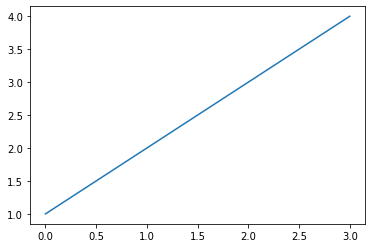

In [2]:
plt.plot([1, 2, 3, 4])
plt.show()

# 정규분포 그래프

- Normal Distribution
- $N(\mu, \sigma^2)$

$f(x) = \cfrac{1}{\sqrt{2\pi}\sigma}e^{-\cfrac{(x-\mu)^2}{2\sigma^2}}$

- Standard Normal Distribution
- $N(0, 1)$

$f(x) = \cfrac{1}{\sqrt{2\pi}}e^{-\cfrac{x^2}{2}}$

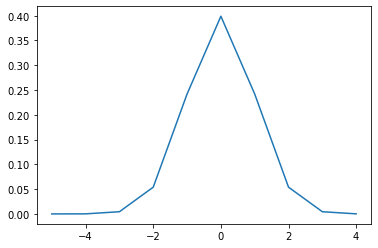

In [3]:
def st_normal_distribution(x):
    f = np.sqrt(1/(2*np.pi))*(np.exp(-(x**2)/2))
    return f
    
    
x = range(-5, 5)
y = [st_normal_distribution(x) for x in x]
plt.plot(x, y)

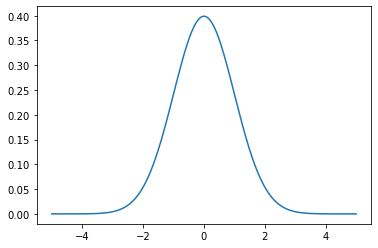

In [4]:
x = np.linspace(-5, 5, 10000)
y = [st_normal_distribution(x) for x in x]
plt.plot(x, y)

plt.show()

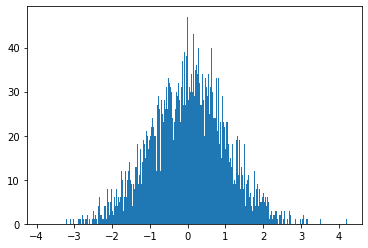

In [5]:
x = np.random.normal(size =10000)
plt.hist(x, bins=1000)
plt.show()

# 표준정규분포 면적 구하기

## 몬테 카를로 적분

In [6]:
def st_normal_distribution(x):
    return np.sqrt(1/(2*np.pi))*(np.exp(-(x**2)/2))

def area(X):
    
    N = int(1e+4)
    W = 2*X

    H = 0.5

    X = W*np.random.random(N)-W/2
    Y = H*np.random.random(N)
    F = st_normal_distribution(X)

    in_or_out = Y < F
    A = H * W * np.sum(in_or_out) / N
    print(A)
    color = list(map(lambda x: 'blue' if x == True else 'red', in_or_out)) #색 정하기

    x = np.linspace(0, 1, 1000) #함수 그리기
    y = [st_normal_distribution(x) for x in x]
    plt.plot(x, y, color = 'black')

    plt.scatter(X, Y, color = color, s=5, label='A = {}'.format(np.round(A, 4)))
    plt.legend(loc = 'lower right') #범례(legend) 위치

    plt.plot([0, W], [0, 0], color='black') # 사각형 영역
    plt.plot([W, W], [0, H], color='black')
    plt.plot([0, W], [H, H], color='black')
    plt.plot([0, 0], [0, H], color='black')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()

0.9535399999999999


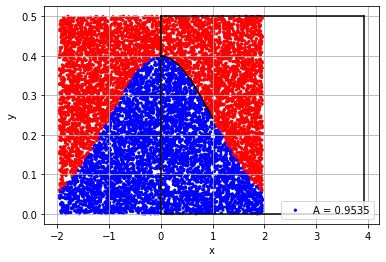

In [7]:
area(1.96) # 95% 신뢰구간

0.974982


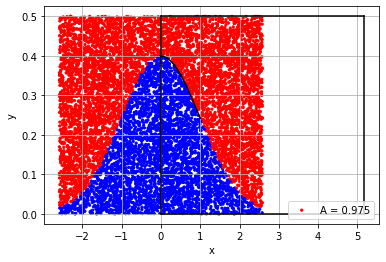

In [8]:
area(2.58) # 99% 신뢰구간

0.8999795


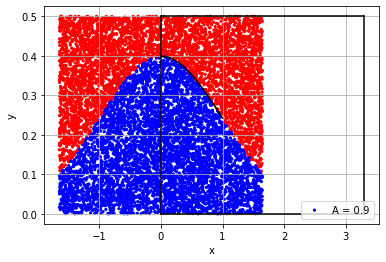

In [9]:
area(1.645) # 90% 신뢰구간

## 부정적분

In [10]:
def st_normal_distribution(x):
    f = np.sqrt(1/(2*np.pi))*(np.exp(-(x**2)/2))
    return f